In [38]:
print('hello world')

hello world


In [2]:
# Install the primary library for HTTP requests and data handling
!pip install requests pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests  # To send API requests to Alpha Vantage
import pandas as pd  # To store and manipulate the data
from datetime import datetime, timedelta  # To handle dates
import time  # To add delays between API calls (if needed)

In [4]:
# Your API key from Alpha Vantage
api_key = '57KJY1FW3E3VL7P7'

# The stock symbol for Tesla
symbol = 'TSLA'

# The API function for daily historical data
function = 'TIME_SERIES_DAILY'

# Define the output size. 'full' returns 20+ years of data.
output_size = 'full'

In [5]:
# Construct the URL for the API request
url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize={output_size}&apikey={api_key}'
print("Request URL ready.")

Request URL ready.


In [6]:
# Send the GET request to the API
r = requests.get(url)

# Check if the request was successful (Status Code 200)
if r.status_code == 200:
    print("API Request Successful!")
    data = r.json()  # Parse the JSON response into a Python dictionary
else:
    print(f"Error: API request failed with status code {r.status_code}")

API Request Successful!


In [7]:
# Extract the 'Time Series (Daily)' key from the JSON response
# The .get() method is safer in case the key doesn't exist
time_series = data.get('Time Series (Daily)')

if time_series is None:
    print("Error: Could not find 'Time Series (Daily)' in the response.")
    print("The API returned this message:", data.get('Note', data.get('Information', 'Unknown')))
else:
    # Convert the dictionary into a Pandas DataFrame
    # The Orient='index' creates a DataFrame where the dates are the index
    df = pd.DataFrame.from_dict(time_series, orient='index', dtype=float)

    # Rename the columns to be more user-friendly
    # Alpha Vantage's default names are '1. open', '2. high', etc.
    df.columns = ['open', 'high', 'low', 'close', 'volume']

    # Convert the index from string to a proper DateTime index
    df.index = pd.to_datetime(df.index)

    # Sort the DataFrame by date (oldest first) for better readability
    df = df.sort_index(ascending=True)

    # Display the first 5 and last 5 rows to verify
    print("Data successfully loaded!")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nLast 5 rows:")
    print(df.tail())

Data successfully loaded!

First 5 rows:
             open     high    low  close      volume
2010-06-29  19.00  25.0000  17.54  23.89  18766300.0
2010-06-30  25.79  30.4192  23.30  23.83  17187100.0
2010-07-01  25.00  25.9200  20.27  21.96   8218800.0
2010-07-02  23.00  23.1000  18.71  19.20   5139800.0
2010-07-06  20.00  20.0000  15.83  16.11   6866900.0

Last 5 rows:
              open    high     low   close      volume
2025-08-18  329.62  336.27  329.59  335.16  56956552.0
2025-08-19  335.79  340.55  327.85  329.31  75956002.0
2025-08-20  329.22  331.37  314.60  323.90  77481768.0
2025-08-21  322.08  324.90  318.68  320.11  55744445.0
2025-08-22  321.66  340.25  319.69  340.01  94016347.0


In [9]:
# Filter the DataFrame to include only dates from 2010-01-01 onwards
df_filtered = df[df.index >= '2010-01-01']

# Check the new start date
print(f"Filtered Data starts from: {df_filtered.index.min()}")
print(f"Filtered Data ends at: {df_filtered.index.max()}")
print(f"Total number of trading days: {len(df_filtered)}")

Filtered Data starts from: 2010-06-29 00:00:00
Filtered Data ends at: 2025-08-22 00:00:00
Total number of trading days: 3812


In [10]:
# Define a filename
filename = 'TSLA_Daily_2010_to_Present.csv'

# Save the DataFrame to a CSV file
df_filtered.to_csv(filename)

print(f"Data successfully saved to {filename}")

Data successfully saved to TSLA_Daily_2010_to_Present.csv


In [11]:
# Display the first 5 rows to see the most recent data
df.head()

,open,high,low,close,volume
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0


In [12]:
df.tail()

,open,high,low,close,volume
2025-08-18,329.62,336.27,329.59,335.16,56956552.0
2025-08-19,335.79,340.55,327.85,329.31,75956002.0
2025-08-20,329.22,331.37,314.60,323.90,77481768.0
2025-08-21,322.08,324.90,318.68,320.11,55744445.0
2025-08-22,321.66,340.25,319.69,340.01,94016347.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3812 entries, 2010-06-29 to 2025-08-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3812 non-null   float64
 1   high    3812 non-null   float64
 2   low     3812 non-null   float64
 3   close   3812 non-null   float64
 4   volume  3812 non-null   float64
dtypes: float64(5)
memory usage: 178.7 KB


In [14]:
# Generate descriptive statistics (count, mean, std, min, max, etc.)
# This helps spot anomalies (e.g., negative volume, absurd prices)
df.describe()

,open,high,low,close,volume
count,3812.000000,3812.000000,3812.000000,3812.000000,3.812000e+03
mean,303.380080,310.009391,296.420675,303.432052,3.019689e+07
std,276.884101,284.348558,269.088267,277.061902,4.537567e+07
min,16.140000,16.630000,14.980000,15.800000,1.185000e+05
25%,171.210000,174.975000,167.218750,171.267500,3.613726e+06
50%,236.975000,242.340000,232.945600,238.115000,7.930613e+06
75%,336.372500,343.234750,330.015000,335.502500,3.116813e+07
max,2295.120000,2318.490000,2186.520000,2238.750000,3.065906e+08


In [15]:
# 1. Check for any missing values (NaN)
print("Missing values in each column:")
print(df.isnull().sum())

# Since stock data is time-series, we can't just drop rows arbitrarily.
# A small amount of missing data might be filled via interpolation.
# However, for major stock data, it's often complete.

# If there are any missing values, a common method is to 'forward fill' (use the last known value)
# df = df.ffill() # Use this only if you have missing values

# 2. Check for duplicate dates
print(f"\nNumber of duplicate index entries: {df.index.duplicated().sum()}")
# If there are duplicates, you need to decide how to handle them (e.g., keep first, keep last)
# df = df[~df.index.duplicated(keep='first')] # Uncomment if needed

# 3. Verify the index is a DatetimeIndex and sort it (oldest first)
df.index = pd.to_datetime(df.index)
df = df.sort_index(ascending=True) # Ensure data is in chronological order

print("\nData cleaned and sorted.")

Missing values in each column:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Number of duplicate index entries: 0

Data cleaned and sorted.


In [16]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  # Ensures plots display in the Jupyter notebook

# Set a style for all our plots
plt.style.use('seaborn-v0_8-whitegrid')  # Clean style with a grid
sns.set_palette("deep")  # Pleasant color palette

UsageError: unrecognized arguments: # Ensures plots display in the Jupyter notebook


In [19]:
# First, let's get a reminder of what our final dataset looks like
print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
df.head()


Dataset Shape: (3812, 5)

Column Names and Data Types:
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object


,open,high,low,close,volume
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0


In [24]:
# Import NumPy (if you haven't already)
import numpy as np

In [25]:
# FEATURE ENGINEERING FOR ALPHA VANTAGE DATA
# Ensure the column names are correct (Alpha Vantage uses lowercase)
# Calculate Daily Returns
df_clean['daily_return'] = df_clean['close'].pct_change() * 100

# Calculate Moving Averages
df_clean['MA_50'] = df_clean['close'].rolling(window=50).mean()
df_clean['MA_200'] = df_clean['close'].rolling(window=200).mean()

# Calculate Volatility (30-day rolling standard deviation)
df_clean['volatility_30d'] = df_clean['daily_return'].rolling(window=30).std()

# Create Trading Signal
df_clean['signal_MA50'] = np.where(df_clean['close'] > df_clean['MA_50'], 1, 0)

# Calculate Daily Range Percentage
df_clean['daily_range_pct'] = (df_clean['high'] - df_clean['low']) / df_clean['close'] * 100

# Create Lagged Features
df_clean['return_lag1'] = df_clean['daily_return'].shift(1)
df_clean['return_lag2'] = df_clean['daily_return'].shift(2)
df_clean['volume_lag1'] = df_clean['volume'].shift(1)

# Remove rows with NaN values created by rolling calculations and shifts
df_clean = df_clean.dropna()

# Verify the new columns are there
print("New columns added. DataFrame now has the following columns:")
print(df_clean.columns.tolist())

New columns added. DataFrame now has the following columns:
['open', 'high', 'low', 'close', 'volume', 'daily_return', 'MA_50', 'MA_200', 'volatility_30d', 'signal_MA50', 'daily_range_pct', 'return_lag1', 'return_lag2', 'volume_lag1']


In [26]:
df_clean.head()

,open,high,low,close,volume,daily_return,MA_50,MA_200,volatility_30d,signal_MA50,daily_range_pct,return_lag1,return_lag2,volume_lag1
2011-04-12,25.08,25.21,24.30,24.65,1357400.0,-2.453502,23.9593,23.726245,3.830336,1,3.691684,-4.605512,-2.753304,1369400.0
2011-04-13,25.13,25.69,24.81,24.93,1211500.0,1.135903,23.9797,23.731445,3.834360,1,3.529884,-2.453502,-4.605512,1357400.0
2011-04-14,24.87,25.28,24.20,25.14,983400.0,0.842359,24.0037,23.737995,3.829471,1,4.295943,1.135903,-2.453502,1211500.0
2011-04-15,25.65,26.18,25.41,25.58,943500.0,1.750199,24.0427,23.756095,3.817803,1,3.010164,0.842359,1.135903,983400.0
2011-04-18,25.13,25.62,24.36,25.03,1033900.0,-2.150117,24.0741,23.785245,3.840774,1,5.033959,1.750199,0.842359,943500.0


In [27]:
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df_clean.shape}")
print(f"\nDate Range: {df_clean.index.min()} to {df_clean.index.max()}")
print(f"Total Trading Days: {len(df_clean)}")
print(f"\nColumns: {df_clean.columns.tolist()}")

=== DATASET OVERVIEW ===
Dataset Shape: (3613, 14)

Date Range: 2011-04-12 00:00:00 to 2025-08-22 00:00:00
Total Trading Days: 3613

Columns: ['open', 'high', 'low', 'close', 'volume', 'daily_return', 'MA_50', 'MA_200', 'volatility_30d', 'signal_MA50', 'daily_range_pct', 'return_lag1', 'return_lag2', 'volume_lag1']


In [28]:
print("=== STATISTICAL SUMMARY ===")
print(df_clean.describe())

=== STATISTICAL SUMMARY ===
              open         high          low        close        volume  \
count  3613.000000  3613.000000  3613.000000  3613.000000  3.613000e+03   
mean    318.779228   325.741346   311.475127   318.838190  3.177383e+07   
std     276.303921   283.840390   268.429240   276.484446  4.609181e+07   
min      21.930000    23.110000    21.500000    21.950000  2.396000e+05   
25%     185.500000   189.289900   182.050000   185.520000  4.127956e+06   
50%     244.825000   248.600000   240.124900   244.500000  8.603300e+06   
75%     342.090000   347.500000   335.280000   341.530000  3.364970e+07   
max    2295.120000  2318.490000  2186.520000  2238.750000  3.065906e+08   

       daily_return        MA_50       MA_200  volatility_30d  signal_MA50  \
count   3613.000000  3613.000000  3613.000000     3613.000000  3613.000000   
mean       0.168789   316.812494   310.793437        3.551621     0.553833   
std        3.997277   262.335011   243.535271        1.837981 

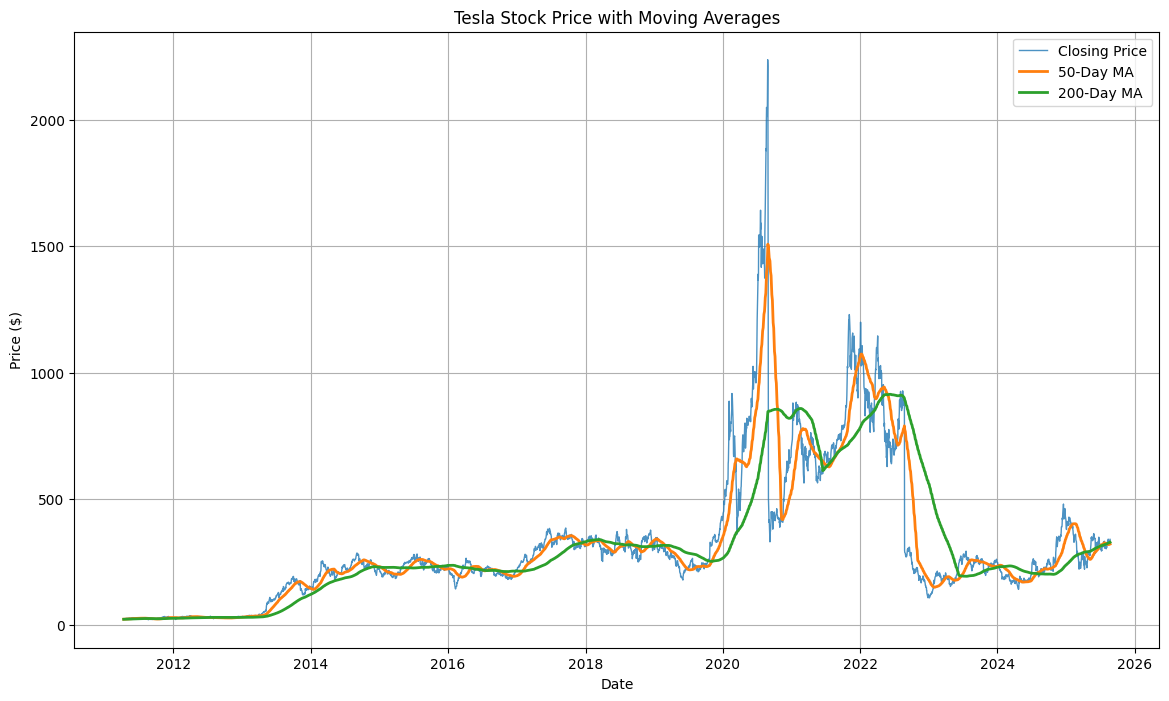

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(df_clean.index, df_clean['close'], label='Closing Price', linewidth=1, alpha=0.8)
plt.plot(df_clean.index, df_clean['MA_50'], label='50-Day MA', linewidth=2)
plt.plot(df_clean.index, df_clean['MA_200'], label='200-Day MA', linewidth=2)
plt.title('Tesla Stock Price with Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

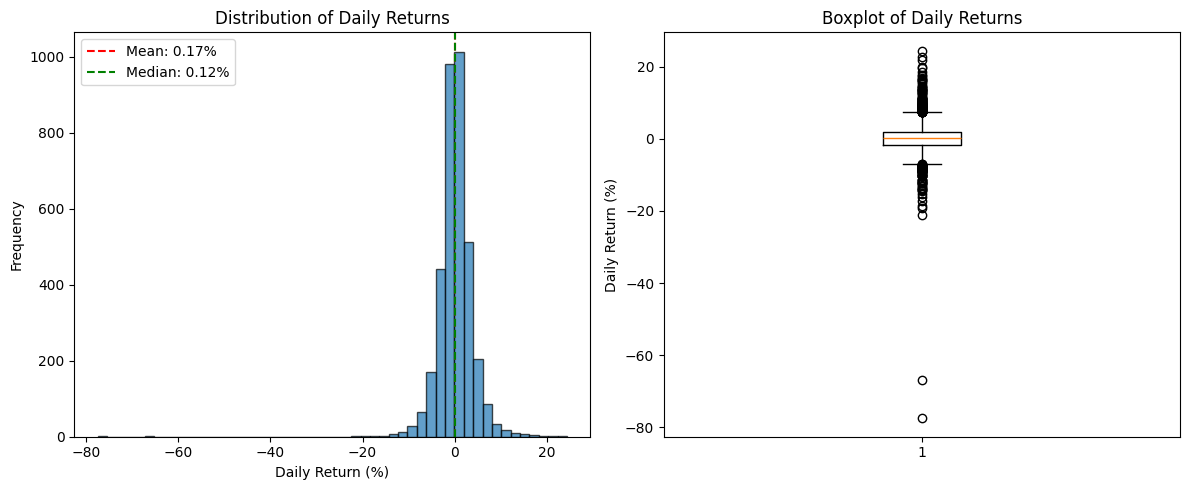

Skewness: -3.03
Kurtosis: 63.64


In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['daily_return'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(df_clean['daily_return'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["daily_return"].mean():.2f}%')
plt.axvline(df_clean['daily_return'].median(), color='green', linestyle='--', label=f'Median: {df_clean["daily_return"].median():.2f}%')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['daily_return'].dropna())
plt.title('Boxplot of Daily Returns')
plt.ylabel('Daily Return (%)')

plt.tight_layout()
plt.show()

print(f"Skewness: {df_clean['daily_return'].skew():.2f}")
print(f"Kurtosis: {df_clean['daily_return'].kurtosis():.2f}")

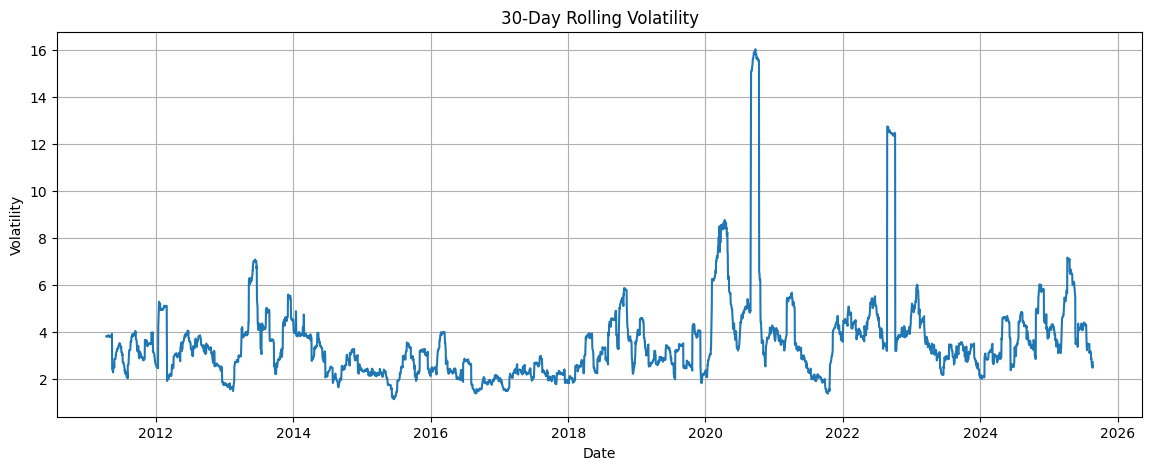

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean.index, df_clean['volatility_30d'])
plt.title('30-Day Rolling Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.grid(True)
plt.show()

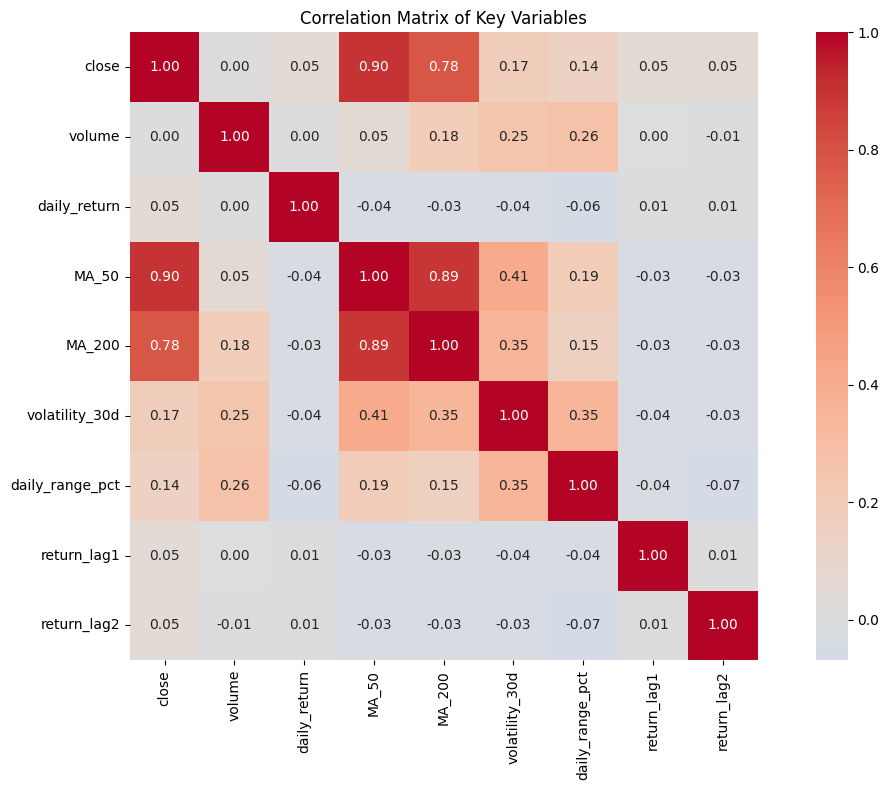

In [32]:
# Select columns for correlation analysis
corr_columns = ['close', 'volume', 'daily_return', 'MA_50', 'MA_200', 
                'volatility_30d', 'daily_range_pct', 'return_lag1', 'return_lag2']

plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[corr_columns].corr(), annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

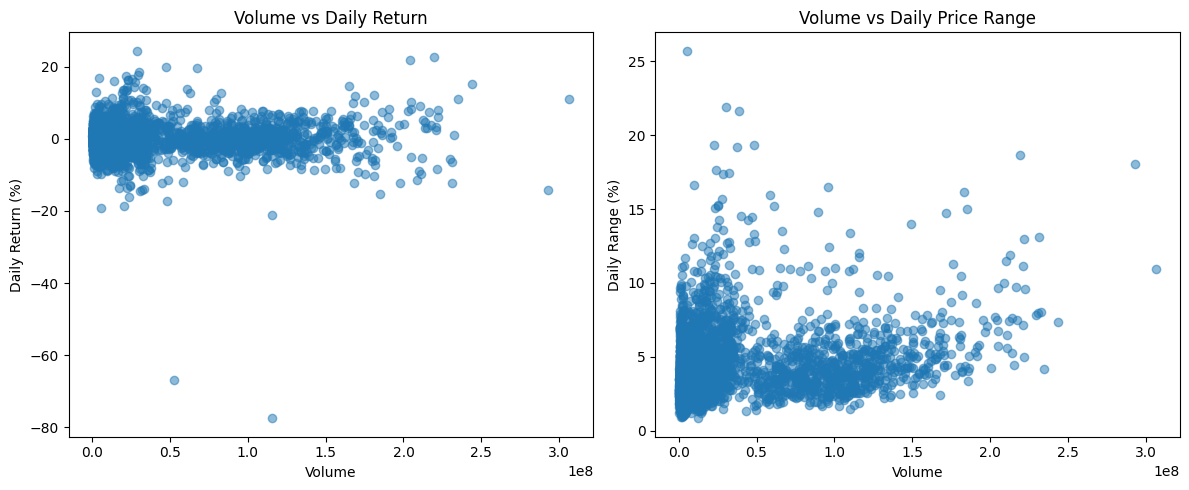

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_clean['volume'], df_clean['daily_return'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Daily Return (%)')
plt.title('Volume vs Daily Return')

plt.subplot(1, 2, 2)
plt.scatter(df_clean['volume'], df_clean['daily_range_pct'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Daily Range (%)')
plt.title('Volume vs Daily Price Range')

plt.tight_layout()
plt.show()

In [34]:
# Analyze performance when price is above vs below 50-Day MA
above_ma50 = df_clean[df_clean['signal_MA50'] == 1]
below_ma50 = df_clean[df_clean['signal_MA50'] == 0]

print("=== PERFORMANCE WHEN PRICE IS ABOVE VS BELOW 50-DAY MA ===")
print(f"Days above 50-Day MA: {len(above_ma50)}")
print(f"Days below 50-Day MA: {len(below_ma50)}")
print(f"\nAverage daily return when above MA50: {above_ma50['daily_return'].mean():.3f}%")
print(f"Average daily return when below MA50: {below_ma50['daily_return'].mean():.3f}%")

=== PERFORMANCE WHEN PRICE IS ABOVE VS BELOW 50-DAY MA ===
Days above 50-Day MA: 2001
Days below 50-Day MA: 1612

Average daily return when above MA50: 0.741%
Average daily return when below MA50: -0.542%


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\712816648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean.index.month
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\712816648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean.index.year


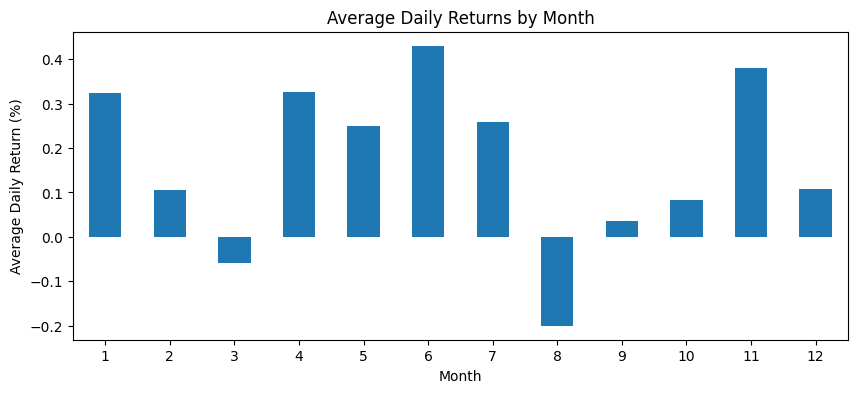

In [35]:
# Add month and year for seasonal analysis
df_clean['month'] = df_clean.index.month
df_clean['year'] = df_clean.index.year

# Monthly average returns
monthly_returns = df_clean.groupby('month')['daily_return'].mean()

plt.figure(figsize=(10, 4))
monthly_returns.plot(kind='bar')
plt.title('Average Daily Returns by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Return (%)')
plt.xticks(rotation=0)
plt.show()

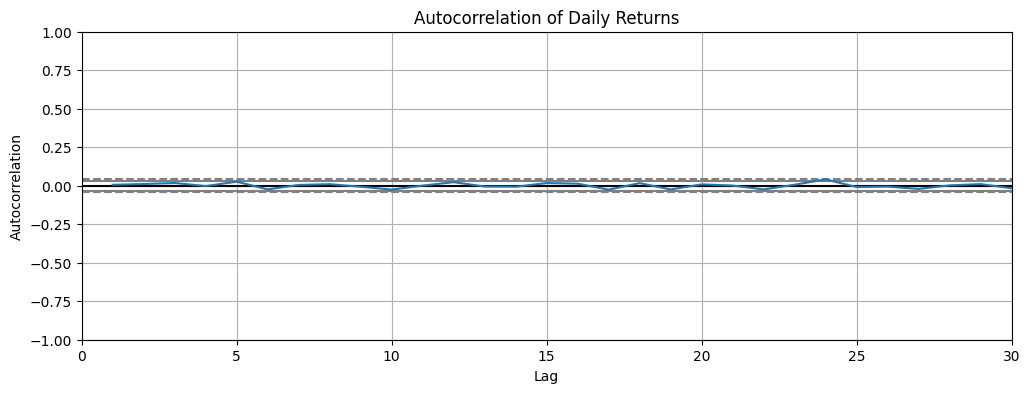

In [37]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 4))
autocorrelation_plot(df_clean['daily_return'])
plt.title('Autocorrelation of Daily Returns')
plt.xlim(0, 30)  # First 30 lags
plt.grid(True)
plt.show()

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\4144548996.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean.index.month
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\4144548996.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax8.boxplot(performance_data, labels=labels, patch_artist=True)
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\4144548996.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


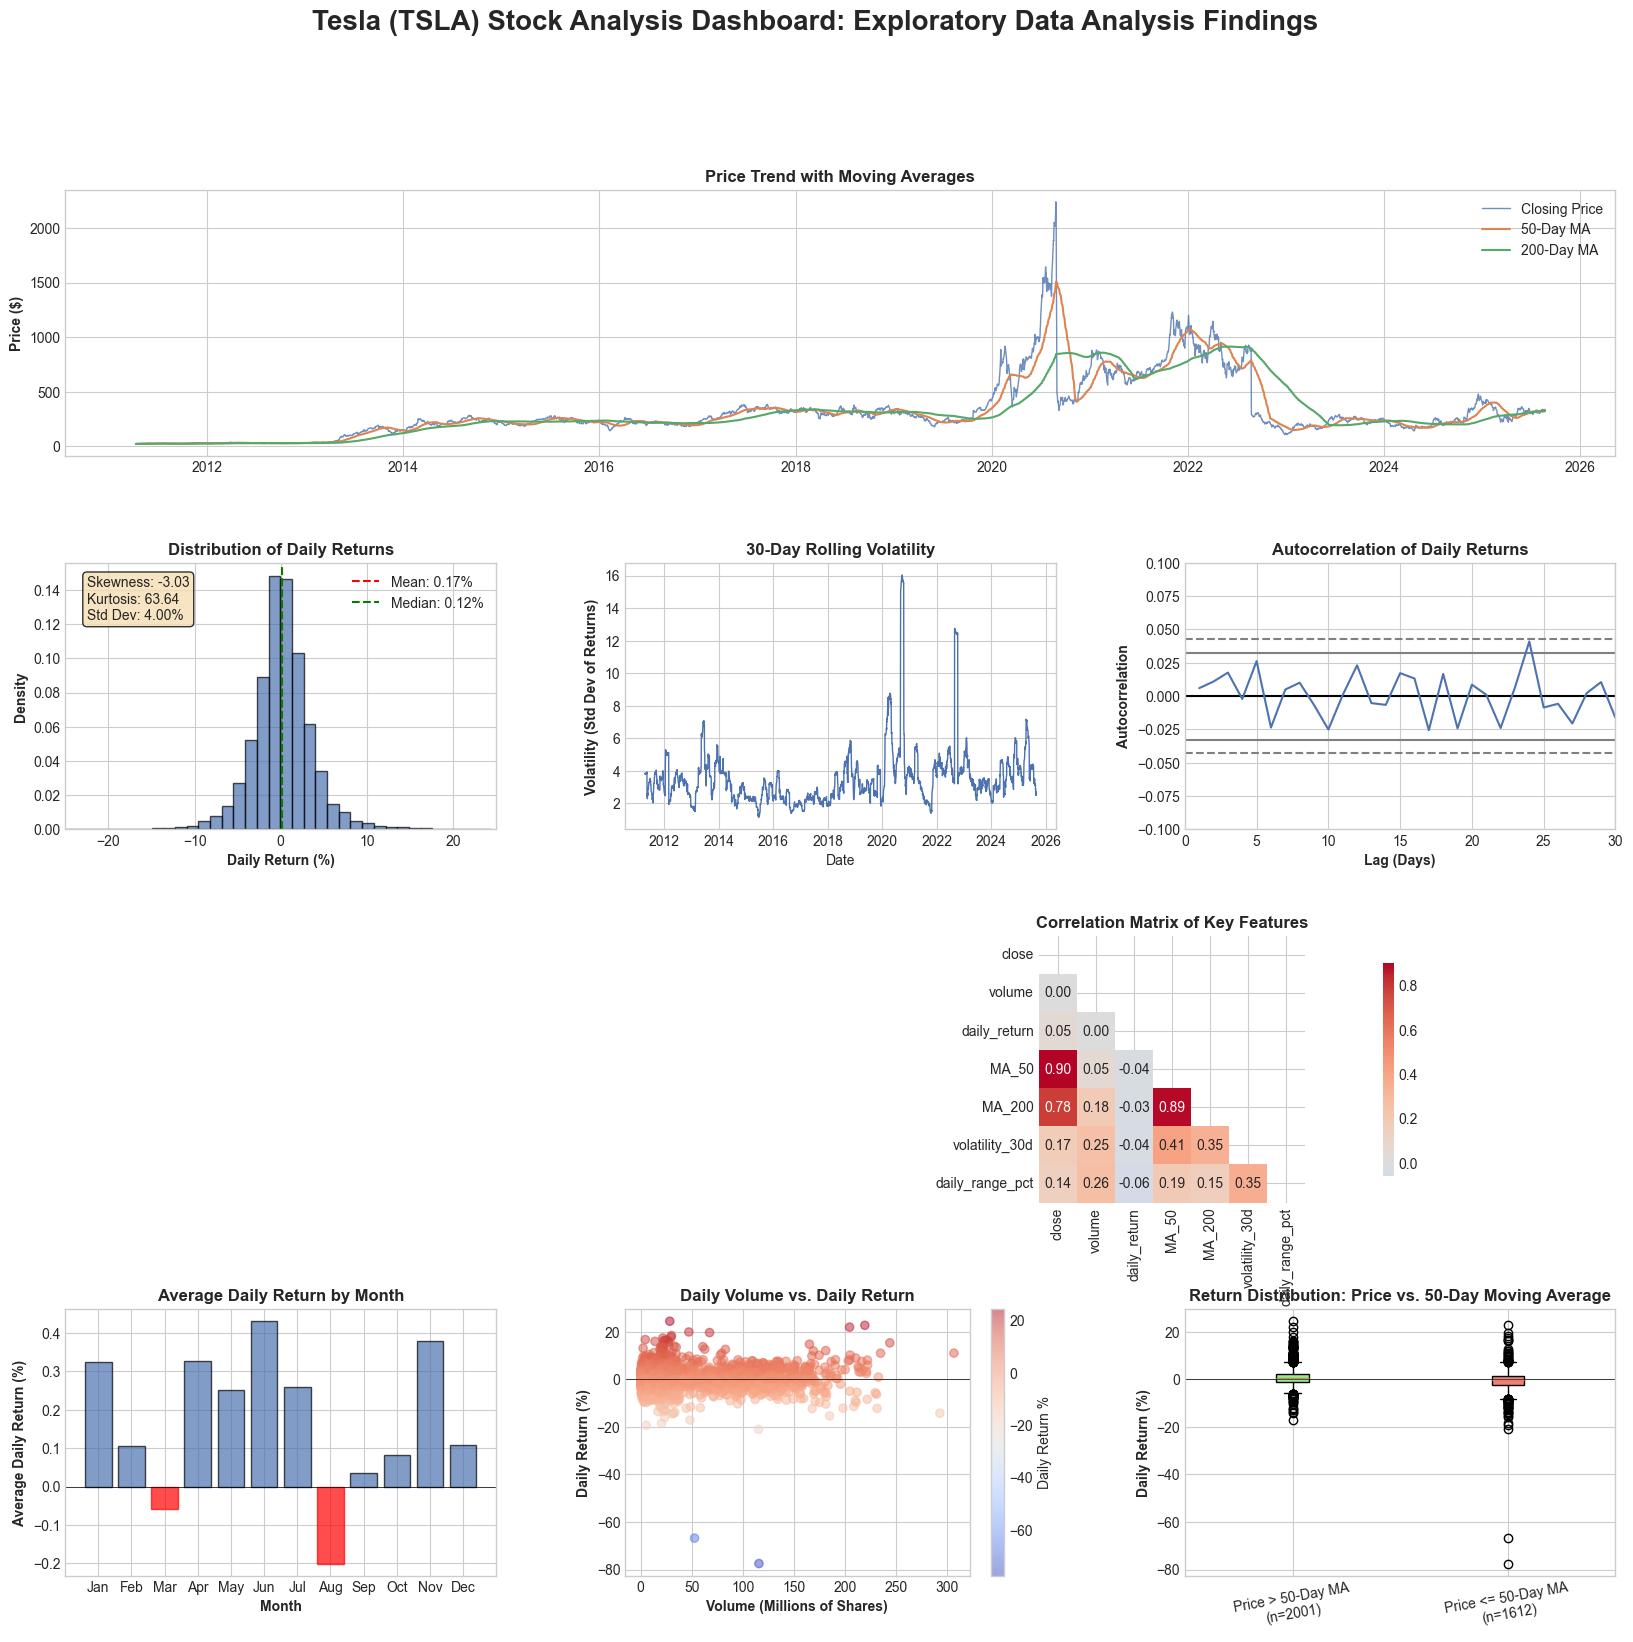


KEY SUMMARY INSIGHTS
1. Trend: The stock has experienced significant long-term growth with clear bull/bear cycles.
2. Returns: Daily returns are not normal (Skew: -3.03, Kurtosis: 63.64).
3. Volatility: Exhibits strong clustering (periods of high & low risk are persistent).
4. Autocorrelation: No significant short-term linear predictability in returns.
5. Volume: Extreme returns (both positive and negative) occur on high-volume days.
6. Signal: Days where price is above its 50-Day MA show a different return profile.


In [39]:
# IMPORT NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
%matplotlib inline

# CREATE THE DASHBOARD FIGURE AND SUBPLOTS
fig = plt.figure(figsize=(20, 18))
fig.suptitle('Tesla (TSLA) Stock Analysis Dashboard: Exploratory Data Analysis Findings', 
             fontsize=20, fontweight='bold', y=0.98)

# Define the grid layout for our dashboard
grid = plt.GridSpec(4, 3, figure=fig, hspace=0.4, wspace=0.3)

# --- PLOT 1: Price & Trend Analysis ---
ax1 = fig.add_subplot(grid[0, :]) # This plot spans the entire first row
ax1.plot(df_clean.index, df_clean['close'], label='Closing Price', linewidth=1, alpha=0.8)
ax1.plot(df_clean.index, df_clean['MA_50'], label='50-Day MA', linewidth=1.5)
ax1.plot(df_clean.index, df_clean['MA_200'], label='200-Day MA', linewidth=1.5)
ax1.set_ylabel('Price ($)', fontweight='bold')
ax1.set_title('Price Trend with Moving Averages', fontweight='bold')
ax1.legend()
ax1.grid(True)

# --- PLOT 2: Distribution of Daily Returns ---
ax2 = fig.add_subplot(grid[1, 0])
ax2.hist(df_clean['daily_return'], bins=75, edgecolor='black', alpha=0.7, density=True)
ax2.axvline(df_clean['daily_return'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["daily_return"].mean():.2f}%')
ax2.axvline(df_clean['daily_return'].median(), color='green', linestyle='--', label=f'Median: {df_clean["daily_return"].median():.2f}%')
ax2.set_xlabel('Daily Return (%)', fontweight='bold')
ax2.set_ylabel('Density', fontweight='bold')
ax2.set_title('Distribution of Daily Returns', fontweight='bold')
ax2.legend()
ax2.set_xlim(-25, 25) # Focus on the core of the distribution

# Add text box with key statistics
stats_text = f'Skewness: {df_clean["daily_return"].skew():.2f}\nKurtosis: {df_clean["daily_return"].kurtosis():.2f}\nStd Dev: {df_clean["daily_return"].std():.2f}%'
ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# --- PLOT 3: Volatility Over Time ---
ax3 = fig.add_subplot(grid[1, 1])
ax3.plot(df_clean.index, df_clean['volatility_30d'], linewidth=1)
ax3.set_ylabel('Volatility (Std Dev of Returns)', fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_title('30-Day Rolling Volatility', fontweight='bold')
ax3.grid(True)

# --- PLOT 4: Autocorrelation of Returns ---
ax4 = fig.add_subplot(grid[1, 2])
autocorrelation_plot(df_clean['daily_return'], ax=ax4)
ax4.set_xlim([0, 30])
ax4.set_ylim([-0.1, 0.1])
ax4.set_title('Autocorrelation of Daily Returns', fontweight='bold')
ax4.set_ylabel('Autocorrelation', fontweight='bold')
ax4.set_xlabel('Lag (Days)', fontweight='bold')
ax4.grid(True)

# --- PLOT 5: Correlation Heatmap (Key Features) ---
ax5 = fig.add_subplot(grid[2, :])
corr_columns = ['close', 'volume', 'daily_return', 'MA_50', 'MA_200', 'volatility_30d', 'daily_range_pct']
corr_matrix = df_clean[corr_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle for clarity

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, ax=ax5, cbar_kws={"shrink": .8})
ax5.set_title('Correlation Matrix of Key Features', fontweight='bold')

# --- PLOT 6: Monthly Seasonality Analysis ---
df_clean['month'] = df_clean.index.month
monthly_avg_returns = df_clean.groupby('month')['daily_return'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax6 = fig.add_subplot(grid[3, 0])
bars = ax6.bar(months, monthly_avg_returns, alpha=0.7, edgecolor='black')
ax6.axhline(0, color='black', linestyle='-', linewidth=0.5)
ax6.set_ylabel('Average Daily Return (%)', fontweight='bold')
ax6.set_xlabel('Month', fontweight='bold')
ax6.set_title('Average Daily Return by Month', fontweight='bold')
# Color negative bars red
for bar, return_val in zip(bars, monthly_avg_returns):
    if return_val < 0:
        bar.set_color('red')

# --- PLOT 7: Volume-Return Relationship ---
ax7 = fig.add_subplot(grid[3, 1])
scatter = ax7.scatter(df_clean['volume'] / 1e6, df_clean['daily_return'], alpha=0.5, c=df_clean['daily_return'], cmap='coolwarm')
ax7.axhline(0, color='black', linestyle='-', linewidth=0.5)
ax7.set_xlabel('Volume (Millions of Shares)', fontweight='bold')
ax7.set_ylabel('Daily Return (%)', fontweight='bold')
ax7.set_title('Daily Volume vs. Daily Return', fontweight='bold')
plt.colorbar(scatter, ax=ax7, label='Daily Return %')

# --- PLOT 8: MA50 Crossover Signal Performance ---
ax8 = fig.add_subplot(grid[3, 2])
above_ma50 = df_clean[df_clean['close'] > df_clean['MA_50']]
below_ma50 = df_clean[df_clean['close'] <= df_clean['MA_50']]

performance_data = [above_ma50['daily_return'], below_ma50['daily_return']]
labels = [f'Price > 50-Day MA\n(n={len(above_ma50)})', f'Price <= 50-Day MA\n(n={len(below_ma50)})']

boxplot = ax8.boxplot(performance_data, labels=labels, patch_artist=True)
# Color the boxes
colors = ['lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax8.axhline(0, color='black', linestyle='-', linewidth=0.5)
ax8.set_ylabel('Daily Return (%)', fontweight='bold')
ax8.set_title('Return Distribution: Price vs. 50-Day Moving Average', fontweight='bold')
plt.xticks(rotation=10)

# --- FINAL LAYOUT & DISPLAY ---
plt.tight_layout()
plt.show()

# Print key insights summary
print("\n" + "="*60)
print("KEY SUMMARY INSIGHTS")
print("="*60)
print(f"1. Trend: The stock has experienced significant long-term growth with clear bull/bear cycles.")
print(f"2. Returns: Daily returns are not normal (Skew: {df_clean['daily_return'].skew():.2f}, Kurtosis: {df_clean['daily_return'].kurtosis():.2f}).")
print(f"3. Volatility: Exhibits strong clustering (periods of high & low risk are persistent).")
print(f"4. Autocorrelation: No significant short-term linear predictability in returns.")
print(f"5. Volume: Extreme returns (both positive and negative) occur on high-volume days.")
print(f"6. Signal: Days where price is above its 50-Day MA show a different return profile.")

In [40]:
!pip install panel hvplot pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/29.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/29.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/29.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/29.5 MB ? eta -:--:--
    --------------------------------------- 0.5/29.5 MB 605.7 kB/s eta 0:00:48
    --------------------------------------- 0.5/29.5 MB 605.7 kB/s eta 0:00:48
   - -------------------------------------- 0.8/29.5 MB 651.5 kB/s eta 0:00:45
   - -------------------------------------- 0.8/29.5 MB 651.5 kB/s eta 0:00:45
   - -------------------------------------- 1.0/29.5 MB 602.5 kB/s eta 0:00:48
   - -------------------------------------- 1.0/29.5 MB 602.5 kB/s eta 0:00:48
   - -------------------------------------- 1.0/29.5 MB 602.5 kB/s eta 0:00:48
   - -------------------------------------- 1.3/29.5 MB 547.2 kB/s eta 0:00:52
   - -------------------------------------- 1.3/29.5 MB 547.2 kB/s eta 0:00:52
   -- ---

In [42]:
df_clean.to_csv('TSLA_wrangled_data.csv')

In [44]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\TOSHIBA


In [46]:
print("hello World")

hello World


In [48]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 2.0 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.7 MB 2.7 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.7 MB 3.3 MB/s eta 0:00:02
   ---------------- ----------------------- 3.7/8.7 MB 3.7 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 5.5/8.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 4.1 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 4.4 MB/s eta 0:00:01
   -------------------------------------

In [49]:
# Model building and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Additional imports
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Create the target variable: Tomorrow's Daily Return
df_clean['target'] = df_clean['daily_return'].shift(-1)

# Now create the direction target: 1 if tomorrow's return is positive, else 0
df_clean['target_direction'] = (df_clean['target'] > 0).astype(int)

# Remove the last row which will have a NaN value for 'target' and 'target_direction'
df_clean = df_clean.dropna(subset=['target', 'target_direction'])

print("Target variable 'target' and 'target_direction' created successfully!")
print(f"New DataFrame shape: {df_clean.shape}")
print("\nValue counts for target_direction:")
print(df_clean['target_direction'].value_counts())

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\3603530487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target'] = df_clean['daily_return'].shift(-1)
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\3603530487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target_direction'] = (df_clean['target'] > 0).astype(int)


Target variable 'target' and 'target_direction' created successfully!
New DataFrame shape: (3612, 18)

Value counts for target_direction:
target_direction
1    1864
0    1748
Name: count, dtype: int64


In [52]:
df_clean.head()

,open,high,low,close,volume,daily_return,MA_50,MA_200,volatility_30d,signal_MA50,daily_range_pct,return_lag1,return_lag2,volume_lag1,month,year,target,target_direction
2011-04-12,25.08,25.21,24.30,24.65,1357400.0,-2.453502,23.9593,23.726245,3.830336,1,3.691684,-4.605512,-2.753304,1369400.0,4,2011,1.135903,1
2011-04-13,25.13,25.69,24.81,24.93,1211500.0,1.135903,23.9797,23.731445,3.834360,1,3.529884,-2.453502,-4.605512,1357400.0,4,2011,0.842359,1
2011-04-14,24.87,25.28,24.20,25.14,983400.0,0.842359,24.0037,23.737995,3.829471,1,4.295943,1.135903,-2.453502,1211500.0,4,2011,1.750199,1
2011-04-15,25.65,26.18,25.41,25.58,943500.0,1.750199,24.0427,23.756095,3.817803,1,3.010164,0.842359,1.135903,983400.0,4,2011,-2.150117,0
2011-04-18,25.13,25.62,24.36,25.03,1033900.0,-2.150117,24.0741,23.785245,3.840774,1,5.033959,1.750199,0.842359,943500.0,4,2011,0.519377,1



Feature set shape: (3612, 11)
Target variable shape: (3612,)

Training set size: 2889
Testing set size: 723
Training period: 2011-04-12 00:00:00 to 2022-10-03 00:00:00
Testing period: 2022-10-04 00:00:00 to 2025-08-21 00:00:00

Features have been scaled.

--- Training Logistic Regression ---
Test Accuracy: 0.4813 (48.13%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.48      0.47      0.48       358
          Up       0.49      0.49      0.49       365

    accuracy                           0.48       723
   macro avg       0.48      0.48      0.48       723
weighted avg       0.48      0.48      0.48       723



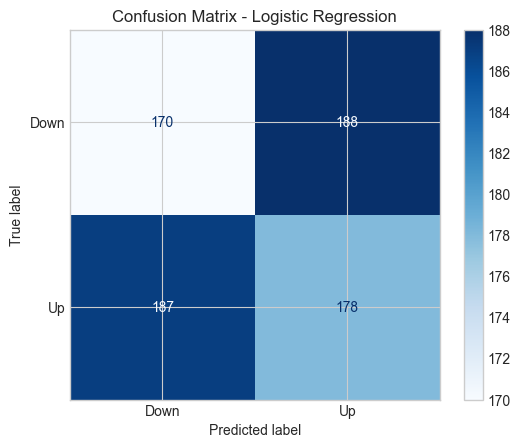


--- Training Random Forest ---
Test Accuracy: 0.4716 (47.16%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.47      0.49      0.48       358
          Up       0.48      0.45      0.46       365

    accuracy                           0.47       723
   macro avg       0.47      0.47      0.47       723
weighted avg       0.47      0.47      0.47       723



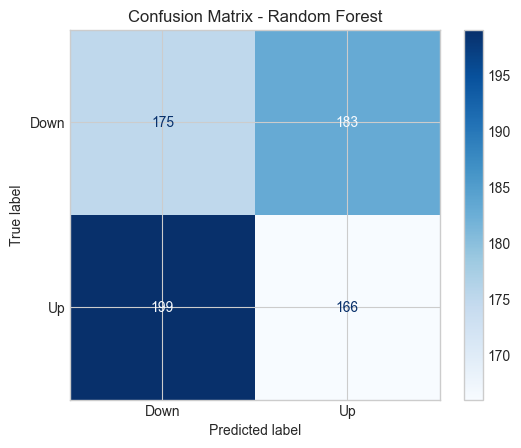


--- Training Gradient Boosting ---
Test Accuracy: 0.4841 (48.41%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.49      0.80      0.60       358
          Up       0.47      0.18      0.26       365

    accuracy                           0.48       723
   macro avg       0.48      0.49      0.43       723
weighted avg       0.48      0.48      0.43       723



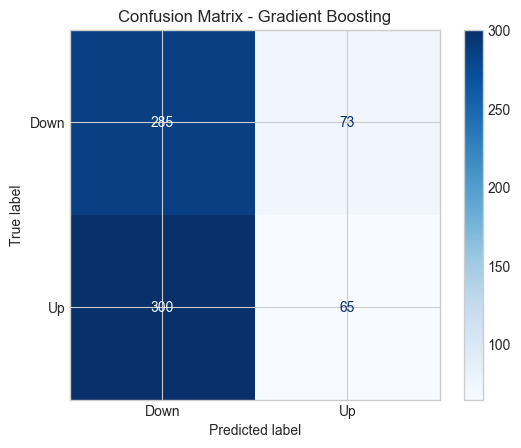


--- Training Support Vector Machine ---
Test Accuracy: 0.4855 (48.55%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.49      0.86      0.62       358
          Up       0.46      0.12      0.19       365

    accuracy                           0.49       723
   macro avg       0.48      0.49      0.41       723
weighted avg       0.48      0.49      0.40       723



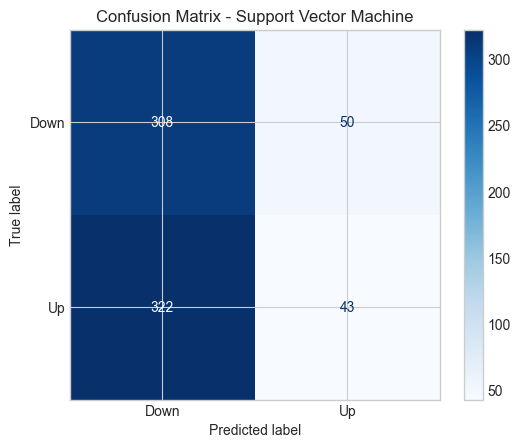


MODEL PERFORMANCE COMPARISON
Logistic Regression: 0.4813
Random Forest: 0.4716
Gradient Boosting: 0.4841
Support Vector Machine: 0.4855

Analyzing feature importance for best model: Support Vector Machine
This model doesn't provide feature importance scores.


In [53]:

# --- CONTINUE WITH MODEL TRAINING ---

# Define the feature set (X) and the target (y)
feature_columns = [
    'close', 'volume', 
    'daily_return', 'return_lag1', 'return_lag2', 'volume_lag1',
    'MA_50', 'MA_200', 
    'volatility_30d', 'daily_range_pct',
    'signal_MA50'
]

X = df_clean[feature_columns]
y = df_clean['target_direction']

print("\nFeature set shape:", X.shape)
print("Target variable shape:", y.shape)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print(f"Training period: {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing period: {X_test.index.min()} to {X_test.index.max()}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures have been scaled.")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, kernel='rbf')
}

# Dictionary to store model performance
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print results
    print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Show detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Compare model performance
print("\n" + "="*50)
print("MODEL PERFORMANCE COMPARISON")
print("="*50)
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Feature Importance Analysis
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nAnalyzing feature importance for best model: {best_model_name}")

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.show()
    
    print("Feature Ranking:")
    print(feature_importance)
else:
    print("This model doesn't provide feature importance scores.")


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


All libraries imported successfully!


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\1991233931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target'] = df_clean['daily_return'].shift(-1)
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\1991233931.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target_direction'] = (df_clean['target'] > 0).astype(int)


Target variables created successfully!
DataFrame shape: (3611, 18)

Target value counts:
target_direction
1    1863
0    1748
Name: count, dtype: int64
Baseline accuracy (always predict majority class): 0.516

Feature set shape: (3611, 11)
Target variable shape: (3611,)

Training set size: 2888
Testing set size: 723
Training period: 2011-04-12 00:00:00 to 2022-09-30 00:00:00
Testing period: 2022-10-03 00:00:00 to 2025-08-20 00:00:00

Features have been scaled.

--- Training Logistic Regression ---
Test Accuracy: 0.5090 (50.90%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.50      0.67      0.58       358
          Up       0.52      0.35      0.42       365

    accuracy                           0.51       723
   macro avg       0.51      0.51      0.50       723
weighted avg       0.51      0.51      0.50       723



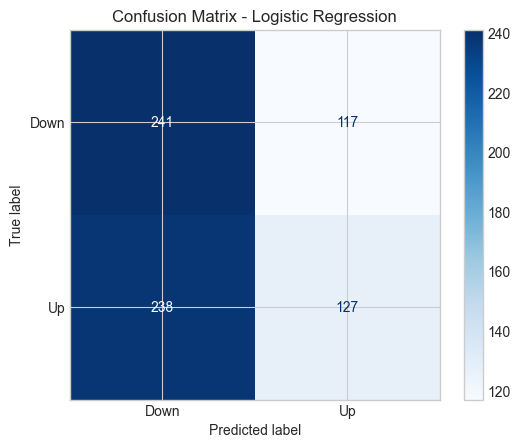


--- Training Random Forest ---
Test Accuracy: 0.4523 (45.23%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.46      0.61      0.53       358
          Up       0.44      0.30      0.35       365

    accuracy                           0.45       723
   macro avg       0.45      0.45      0.44       723
weighted avg       0.45      0.45      0.44       723



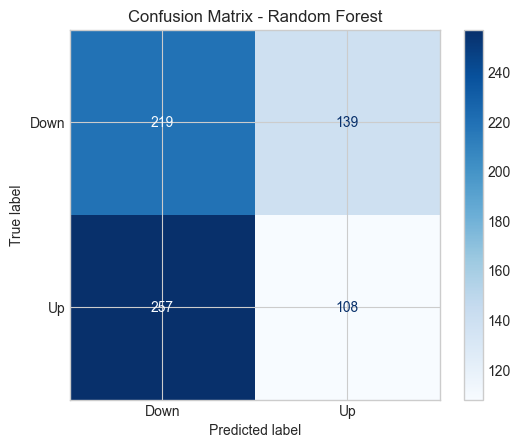


--- Training Gradient Boosting ---
Test Accuracy: 0.5076 (50.76%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.50      0.71      0.59       358
          Up       0.52      0.31      0.39       365

    accuracy                           0.51       723
   macro avg       0.51      0.51      0.49       723
weighted avg       0.51      0.51      0.49       723



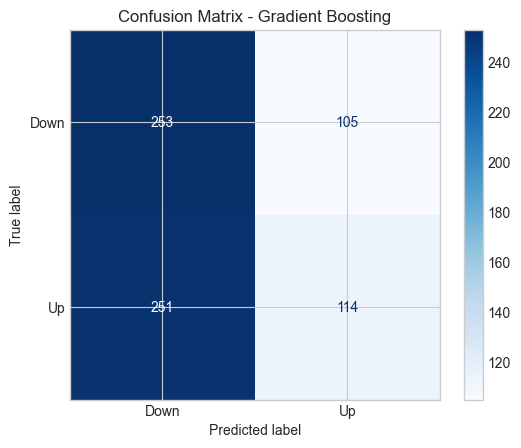


--- Training Support Vector Machine ---
Test Accuracy: 0.4799 (47.99%)

Classification Report:
              precision    recall  f1-score   support

        Down       0.49      0.90      0.63       358
          Up       0.41      0.07      0.12       365

    accuracy                           0.48       723
   macro avg       0.45      0.48      0.38       723
weighted avg       0.45      0.48      0.37       723



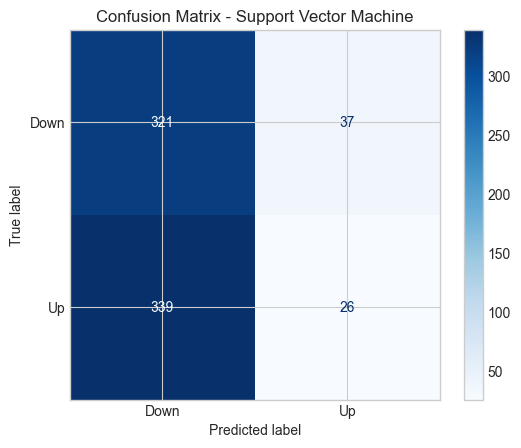


MODEL PERFORMANCE COMPARISON
Logistic Regression: 0.5090
Random Forest: 0.4523
Gradient Boosting: 0.5076
Support Vector Machine: 0.4799

The best model is: Logistic Regression

--- Performing Deep Dive Analysis on Logistic Regression ---


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\1991233931.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confidence_group = results_df.groupby('Confidence_Bin')['Actual_Direction'].agg(['mean', 'count'])


Accuracy based on Model Confidence:
                     mean  count
Confidence_Bin                  
Low             57.458564    181
Medium          49.171271    181
High            42.777778    180
Very High       52.486188    181

This shows if the model is well-calibrated. When it's 90% confident, is it right 90% of the time?


In [57]:
# INSTALL REQUIRED LIBRARY (if not already installed)
!pip install scikit-learn

# Now import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model building and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

print("All libraries imported successfully!")

# --- CREATE THE TARGET VARIABLE FIRST ---
# Create the target variable: Tomorrow's Daily Return
df_clean['target'] = df_clean['daily_return'].shift(-1)

# Create the direction target: 1 if tomorrow's return is positive, else 0
df_clean['target_direction'] = (df_clean['target'] > 0).astype(int)

# Remove the last row which will have a NaN value
df_clean = df_clean.dropna(subset=['target', 'target_direction'])

print("Target variables created successfully!")
print(f"DataFrame shape: {df_clean.shape}")
print("\nTarget value counts:")
print(df_clean['target_direction'].value_counts())
print(f"Baseline accuracy (always predict majority class): {max(df_clean['target_direction'].value_counts(normalize=True)):.3f}")

# --- CONTINUE WITH MODEL TRAINING ---

# Define the feature set (X) and the target (y)
feature_columns = [
    'close', 'volume', 
    'daily_return', 'return_lag1', 'return_lag2', 'volume_lag1',
    'MA_50', 'MA_200', 
    'volatility_30d', 'daily_range_pct',
    'signal_MA50'
]

X = df_clean[feature_columns]
y = df_clean['target_direction']

print("\nFeature set shape:", X.shape)
print("Target variable shape:", y.shape)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print(f"Training period: {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing period: {X_test.index.min()} to {X_test.index.max()}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures have been scaled.")

# Initialize models - NOTE THE FIXED SVC MODEL WITH probability=True
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, kernel='rbf', probability=True) # <-- THE FIX IS HERE
}

# Dictionary to store model performance
results = {}
trained_models = {} # Dictionary to store the trained model objects

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model # Store the trained model
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print results
    print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Show detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Compare model performance
print("\n" + "="*50)
print("MODEL PERFORMANCE COMPARISON")
print("="*50)
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Identify the best model
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]
print(f"\nThe best model is: {best_model_name}")

# --- NOW PROCEED WITH THE DEEP DIVE ANALYSIS ---
print(f"\n--- Performing Deep Dive Analysis on {best_model_name} ---")

# Get predicted probabilities instead of just classes
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class "1" (Up)
y_pred = best_model.predict(X_test_scaled)

# Create a DataFrame to analyze the results
results_df = pd.DataFrame(X_test_scaled, columns=X_train.columns, index=X_test.index)
results_df['Actual_Return'] = df_clean.loc[y_test.index, 'target'] # The actual next day's return
results_df['Actual_Direction'] = y_test
results_df['Predicted_Direction'] = y_pred
results_df['Predicted_Probability_Up'] = y_pred_proba

# Analyze performance based on model confidence
results_df['Confidence_Bin'] = pd.qcut(results_df['Predicted_Probability_Up'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
confidence_group = results_df.groupby('Confidence_Bin')['Actual_Direction'].agg(['mean', 'count'])
confidence_group['mean'] = confidence_group['mean'] * 100  # Convert to percentage

print("Accuracy based on Model Confidence:")
print(confidence_group)
print("\nThis shows if the model is well-calibrated. When it's 90% confident, is it right 90% of the time?")


In [55]:
print('hello world')

hello world


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\935312670.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_and_hold_return = (df_clean.loc[results_df.index, 'close'][-1] / df_clean.loc[results_df.index, 'close'][0] - 1) * 100



--- Trading Strategy Results ---
Initial Capital: $10,000.00
Final Model Value: $14,126.30
Model Strategy Return: 41.26%
Buy-and-Hold Strategy Return: 33.62%
Model Outperformance: 7.64%


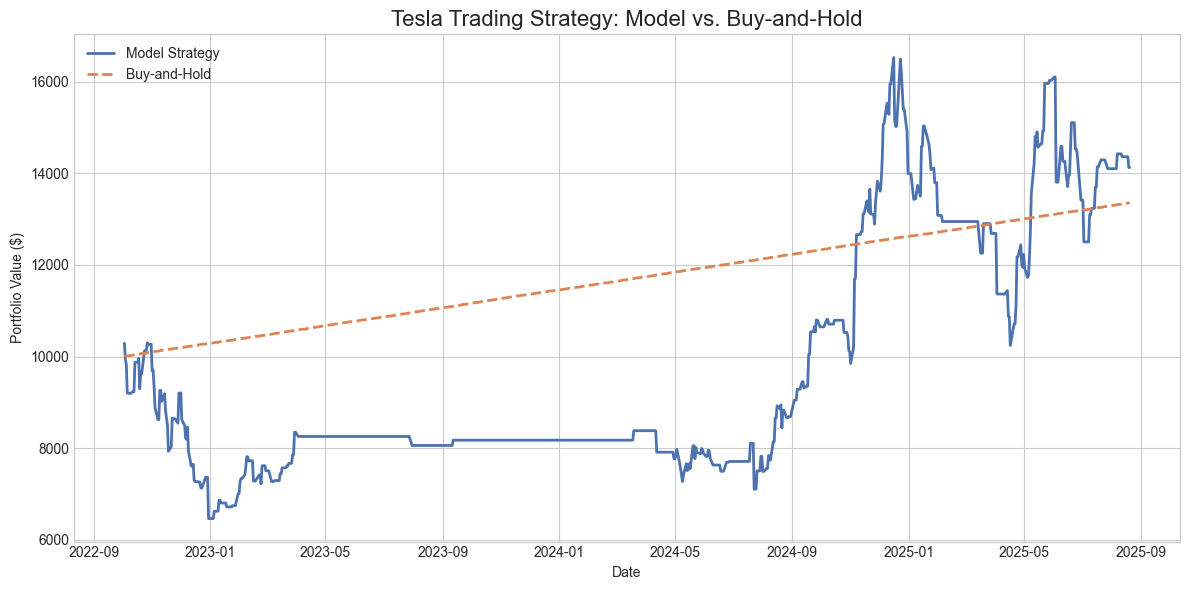


--- Error Analysis ---
Total Errors: 355/723 (49.1%)
Avg. Absolute Return on Error Days: 2.89%
Avg. Absolute Return on Correct Days: 2.85%


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1828\935312670.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_df['Abs_Return'] = np.abs(correct_df['Actual_Return'])


In [58]:
# ... [After the deep dive code] ...

# 1. Simulate Trading Strategy
initial_capital = 10000
capital = initial_capital
portfolio_value = []
position = 0  # 0 = out of market, 1 = invested

for i, (index, row) in enumerate(results_df.iterrows()):
    actual_return = row['Actual_Return'] / 100  # Convert percentage to decimal
    predicted_direction = row['Predicted_Direction']
    
    # Simple Strategy: Go all-in on "Up" predictions, go to cash on "Down"
    if predicted_direction == 1 and position == 0:
        position = 1
    elif predicted_direction == 0 and position == 1:
        position = 0
        
    daily_return = actual_return if position == 1 else 0
    capital = capital * (1 + daily_return)
    portfolio_value.append(capital)

# Calculate strategy performance
final_value = portfolio_value[-1]
total_return = (final_value - initial_capital) / initial_capital * 100
buy_and_hold_return = (df_clean.loc[results_df.index, 'close'][-1] / df_clean.loc[results_df.index, 'close'][0] - 1) * 100

print(f"\n--- Trading Strategy Results ---")
print(f"Initial Capital: ${initial_capital:,.2f}")
print(f"Final Model Value: ${final_value:,.2f}")
print(f"Model Strategy Return: {total_return:.2f}%")
print(f"Buy-and-Hold Strategy Return: {buy_and_hold_return:.2f}%")
print(f"Model Outperformance: {total_return - buy_and_hold_return:.2f}%")

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, portfolio_value, label='Model Strategy', linewidth=2)
buy_hold_value = [initial_capital * (1 + buy_and_hold_return/100 * i/len(results_df)) for i in range(len(results_df))]
plt.plot(results_df.index, buy_hold_value, label='Buy-and-Hold', linestyle='--', linewidth=2)
plt.title('Tesla Trading Strategy: Model vs. Buy-and-Hold', fontsize=16)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Analyze Errors
print("\n--- Error Analysis ---")
results_df['Error'] = results_df['Actual_Direction'] != results_df['Predicted_Direction']
error_df = results_df[results_df['Error']].copy()
print(f"Total Errors: {len(error_df)}/{len(results_df)} ({len(error_df)/len(results_df)*100:.1f}%)")

if not error_df.empty:
    # Analyze volatility on error days vs. correct days
    error_df['Abs_Return'] = np.abs(error_df['Actual_Return'])
    correct_df = results_df[~results_df['Error']]
    correct_df['Abs_Return'] = np.abs(correct_df['Actual_Return'])
    
    print(f"Avg. Absolute Return on Error Days: {error_df['Abs_Return'].mean():.2f}%")
    print(f"Avg. Absolute Return on Correct Days: {correct_df['Abs_Return'].mean():.2f}%")
    # This tells you if the model fails more on volatile days